In [1]:
import sympy as sp
import numpy as np
from matplotlib.pyplot import subplots as spp
from numpy import linalg as LA
from sympy.physics.matrices import msigma

In [2]:
theta=np.pi*(30/180)
phi=0

In [3]:
a_i = sp.symbols("a1:3")  # Bravais lattice vectors
a = sp.Symbol("a", real=True)
I = sp.I
pi = sp.pi
hb = sp.Symbol("ℏ", real=True)
S = sp.Symbol("S", real=True)

J = sp.Symbol("J", real=True)  # Heisenberg coupling
K = sp.Symbol("K", real=True)  # Kitaev coupling
Gamma = sp.Symbol("Γ", real=True)
gamma = sp.Symbol("Γ'", real=True)
h = sp.Symbol("h", real=True)

In [4]:
Theta = theta
Phi = phi
uni = sp.Matrix([[np.cos(Theta/2),np.sin(Theta / 2)],[np.sin(Theta/2)*np.exp(1j*Phi),-np.cos(Theta / 2) * np.exp(1j * Phi)]])
uni_dag = sp.transpose(sp.conjugate(uni))


pxd = sp.simplify(uni_dag*msigma(1)*uni)
pyd = sp.simplify(uni_dag*msigma(2)*uni)
pzd = sp.simplify(uni_dag * msigma(3) * uni)

V1 = sp.simplify(sp.Matrix([(pxd[0, 1] + pxd[1, 0]) / 2, (pxd[1, 0] - pxd[0, 1]) / (2 * I), (pxd[0, 0] - pxd[1, 1]) / 2]))
V2 = sp.simplify(sp.Matrix([(pyd[0, 1] + pyd[1, 0]) / 2, (pyd[1, 0] - pyd[0, 1]) / (2 * I), (pyd[0, 0] - pyd[1, 1]) / 2]))
V3 = sp.simplify(sp.Matrix([(pzd[0, 1] + pzd[1, 0]) / 2, (pzd[1, 0] - pzd[0, 1]) / (2 * I), (pzd[0, 0] - pzd[1, 1]) / 2]))

In [5]:
Theta = np.pi-theta
Phi = phi
uni = sp.Matrix([[np.cos(Theta/2),np.sin(Theta / 2)],[np.sin(Theta/2)*np.exp(1j*Phi),-np.cos(Theta / 2) * np.exp(1j * Phi)]])
uni_dag = sp.transpose(sp.conjugate(uni))


pxd = sp.simplify(uni_dag*msigma(1)*uni)
pyd = sp.simplify(uni_dag*msigma(2)*uni)
pzd = sp.simplify(uni_dag * msigma(3) * uni)

W1 = sp.simplify(sp.Matrix([(pxd[0, 1] + pxd[1, 0]) / 2, (pxd[1, 0] - pxd[0, 1]) / (2 * I), (pxd[0, 0] - pxd[1, 1]) / 2]))
W2 = sp.simplify(sp.Matrix([(pyd[0, 1] + pyd[1, 0]) / 2, (pyd[1, 0] - pyd[0, 1]) / (2 * I), (pyd[0, 0] - pyd[1, 1]) / 2]))
W3 = sp.simplify(sp.Matrix([(pzd[0, 1] + pzd[1, 0]) / 2, (pzd[1, 0] - pzd[0, 1]) / (2 * I), (pzd[0, 0] - pzd[1, 1]) / 2]))

In [6]:
Hberg_ud = V1 * sp.Transpose(W1) + V2 * sp.Transpose(W2) + V3 * sp.Transpose(W3)

IsingXX_ud = V1 * sp.Transpose(W1)
IsingYY_ud = V2 * sp.Transpose(W2)
IsingZZ_ud = V3 * sp.Transpose(W3)

XY_ud = V1 * sp.Transpose(W2)
XZ_ud = V1 * sp.Transpose(W3)
YX_ud = V2 * sp.Transpose(W1)
YZ_ud = V2 * sp.Transpose(W3)
ZX_ud = V3 * sp.Transpose(W1)
ZY_ud = V3 * sp.Transpose(W2)

Hx_ud = 2 * K * IsingXX_ud + J * Hberg_ud + Gamma * (YZ_ud + ZY_ud) + gamma * (YX_ud + ZX_ud + XY_ud + XZ_ud)
Hy_ud = 2 * K * IsingYY_ud + J * Hberg_ud + Gamma * (XZ_ud + ZX_ud) + gamma * (YZ_ud + YX_ud + ZY_ud + XY_ud)
Hz_ud = 2 * K * IsingZZ_ud + J * Hberg_ud + Gamma * (XY_ud + YX_ud) + gamma * (XZ_ud + YZ_ud + ZX_ud + ZY_ud)

In [7]:
Hberg_ud

Matrix([
[             -0.5,   0, -0.866025403784439],
[                0, 1.0,                  0],
[0.866025403784439,   0,               -0.5]])

In [23]:
V1 * sp.Transpose(V1) + V2 * sp.Transpose(V2) + V3 * sp.Transpose(V3)

Matrix([
[1.0,   0,   0],
[  0, 1.0,   0],
[  0,   0, 1.0]])

In [24]:
W1 * sp.Transpose(W1) + W2 * sp.Transpose(W2) + W3 * sp.Transpose(W3)

Matrix([
[1.0,   0,   0],
[  0, 1.0,   0],
[  0,   0, 1.0]])

In [8]:
e = sp.Symbol("e")
f = sp.Symbol("f")
g = sp.Symbol("g")
h = sp.Symbol("h")
n_i = sp.Symbol("𝑛𝑖")
n_j = sp.Symbol("𝑛𝑗")

HPXX = 1 / sp.Integer(2) * (e + f + g + h)
HPYY = -1 / sp.Integer(2) * (e - f - g + h)
HPZZ = (S - n_i - n_j)
HPXY = 1 / (2 * I) * (e - f + g - h)
HPYX = 1 / (2 * I) * (e + f - g - h)

# for now we didn't how to calculate single a, a+...
HPXZ = 0
HPYZ = 0
HPZX = 0
HPZY = 0

HPbosons = sp.Matrix([[HPXX, HPXY, HPXZ], [HPYX, HPYY, HPYZ], [HPZX, HPZY,
                                                                   HPZZ]])
o = sp.Integer(0)
ii = sp.Integer(1)

In [9]:
HPHx_ud = sp.Integer(0)

i = 0
while i < 3:
    j = 0
    while j < 3:
        HPHx_ud = HPHx_ud + Hx_ud[i, j] * HPbosons[i, j]
        j += 1
    i += 1

HPHx_ud = HPHx_ud.expand()

Coef_HPHx_ud = sp.Matrix([o, o, o, o, o, o])
Coef_HPHx_ud[0, 0] = HPHx_ud.coeff(e)
Coef_HPHx_ud[1, 0] = HPHx_ud.coeff(f)
Coef_HPHx_ud[2, 0] = HPHx_ud.coeff(g)
Coef_HPHx_ud[3, 0] = HPHx_ud.coeff(h)
Coef_HPHx_ud[4, 0] = HPHx_ud.coeff(n_i)
Coef_HPHx_ud[5, 0] = HPHx_ud.coeff(n_j)

Mat_Coef_HPHx_ud = sp.Matrix([
    [Coef_HPHx_ud[4, 0], Coef_HPHx_ud[2, 0], o, Coef_HPHx_ud[3, 0]],
    [Coef_HPHx_ud[1, 0], Coef_HPHx_ud[5, 0], Coef_HPHx_ud[3, 0], o],
    [o, Coef_HPHx_ud[0, 0], Coef_HPHx_ud[5, 0], Coef_HPHx_ud[2, 0]],
    [Coef_HPHx_ud[0, 0], o, Coef_HPHx_ud[1, 0], Coef_HPHx_ud[4, 0]]
])

HPHy_ud = sp.Integer(0)

i = 0
while i < 3:
    j = 0
    while j < 3:
        HPHy_ud = HPHy_ud + Hy_ud[i, j] * HPbosons[i, j]
        j += 1
    i += 1

HPHy_ud = HPHy_ud.expand()

Coef_HPHy_ud = sp.Matrix([o, o, o, o, o, o])
Coef_HPHy_ud[0, 0] = HPHy_ud.coeff(e)
Coef_HPHy_ud[1, 0] = HPHy_ud.coeff(f)
Coef_HPHy_ud[2, 0] = HPHy_ud.coeff(g)
Coef_HPHy_ud[3, 0] = HPHy_ud.coeff(h)
Coef_HPHy_ud[4, 0] = HPHy_ud.coeff(n_i)
Coef_HPHy_ud[5, 0] = HPHy_ud.coeff(n_j)

Mat_Coef_HPHy_ud = sp.Matrix([
    [Coef_HPHy_ud[4, 0], Coef_HPHy_ud[2, 0], o, Coef_HPHy_ud[3, 0]],
    [Coef_HPHy_ud[1, 0], Coef_HPHy_ud[5, 0], Coef_HPHy_ud[3, 0], o],
    [o, Coef_HPHy_ud[0, 0], Coef_HPHy_ud[5, 0], Coef_HPHy_ud[2, 0]],
    [Coef_HPHy_ud[0, 0], o, Coef_HPHy_ud[1, 0], Coef_HPHy_ud[4, 0]]
])

HPHz_ud = sp.Integer(0)

i = 0
while i < 3:
    j = 0
    while j < 3:
        HPHz_ud = HPHz_ud + Hz_ud[i, j] * HPbosons[i, j]
        j += 1
    i += 1

HPHz_ud = HPHz_ud.expand()

Coef_HPHz_ud = sp.Matrix([o, o, o, o, o, o])
Coef_HPHz_ud[0, 0] = HPHz_ud.coeff(e)
Coef_HPHz_ud[1, 0] = HPHz_ud.coeff(f)
Coef_HPHz_ud[2, 0] = HPHz_ud.coeff(g)
Coef_HPHz_ud[3, 0] = HPHz_ud.coeff(h)
Coef_HPHz_ud[4, 0] = HPHz_ud.coeff(n_i)
Coef_HPHz_ud[5, 0] = HPHz_ud.coeff(n_j)

Mat_Coef_HPHz_ud = sp.Matrix([
    [Coef_HPHz_ud[4, 0], Coef_HPHz_ud[2, 0], o, Coef_HPHz_ud[3, 0]],
    [Coef_HPHz_ud[1, 0], Coef_HPHz_ud[5, 0], Coef_HPHz_ud[3, 0], o],
    [o, Coef_HPHz_ud[0, 0], Coef_HPHz_ud[5, 0], Coef_HPHz_ud[2, 0]],
    [Coef_HPHz_ud[0, 0], o, Coef_HPHz_ud[1, 0], Coef_HPHz_ud[4, 0]]
])


In [10]:

# Fourier transform
deltaX = a / sp.sqrt(3) * sp.Matrix([sp.sqrt(3) / 2, -1 / sp.Integer(2)])
deltaY = a / sp.sqrt(3) * sp.Matrix([sp.Integer(0), sp.Integer(1)])
deltaZ = a / sp.sqrt(3) * sp.Matrix([-sp.sqrt(3) / 2, -1 / sp.Integer(2)])


k1 = sp.Symbol("k1", real=True)
k2 = sp.Symbol("k2", real=True)
k = sp.Matrix([k1, k2])

sx = sp.exp(I * k.dot(deltaX))
sy = sp.exp(I * k.dot(deltaY))
sz = sp.exp(I * k.dot(deltaZ))
tx = sp.exp(-I * k.dot(deltaX))
ty = sp.exp(-I * k.dot(deltaY))
tz = sp.exp(-I * k.dot(deltaZ))

FT_Coef_X = sp.Matrix([[ii, sx, o, sx], [tx, ii, tx, o], [o, sx, ii, sx], [tx, o,
                                                                               tx, ii]])
FT_Coef_Y = sp.Matrix([[ii, sy, o, sy], [ty, ii, ty, o], [o, sy, ii, sy], [ty, o,
                                                                               ty, ii]])
FT_Coef_Z = sp.Matrix([[ii, sz, o, sz], [tz, ii, tz, o], [o, sz, ii, sz], [tz, o,
                                                                               tz, ii]])
HlswTwoSub_X_ud = sp.Matrix([[o, o, o, o], [o, o, o, o], [o, o, o, o], [o, o, o, o]])

i = 0
while i < 4:
    j = 0
    while j < 4:
        HlswTwoSub_X_ud[i, j] = Mat_Coef_HPHx_ud[i, j] * FT_Coef_X[i, j]
        j += 1
    i += 1

HlswTwoSub_Y_ud = sp.Matrix([[o, o, o, o], [o, o, o, o], [o, o, o, o], [o, o, o, o]])

i = 0
while i < 4:
    j = 0
    while j < 4:
        HlswTwoSub_Y_ud[i, j] = Mat_Coef_HPHy_ud[i, j] * FT_Coef_Y[i, j]
        j += 1
    i += 1

HlswTwoSub_Z_ud = sp.Matrix([[o, o, o, o], [o, o, o, o], [o, o, o, o], [o, o, o, o]])

i = 0
while i < 4:
    j = 0
    while j < 4:
        HlswTwoSub_Z_ud[i, j] = Mat_Coef_HPHz_ud[i, j] * FT_Coef_Z[i, j]
        j += 1
    i += 1



In [11]:
FT_Coef_X

Matrix([
[                                1, exp(I*(a*k1/2 - sqrt(3)*a*k2/6)),                                 0, exp(I*(a*k1/2 - sqrt(3)*a*k2/6))],
[exp(-I*(a*k1/2 - sqrt(3)*a*k2/6)),                                1, exp(-I*(a*k1/2 - sqrt(3)*a*k2/6)),                                0],
[                                0, exp(I*(a*k1/2 - sqrt(3)*a*k2/6)),                                 1, exp(I*(a*k1/2 - sqrt(3)*a*k2/6))],
[exp(-I*(a*k1/2 - sqrt(3)*a*k2/6)),                                0, exp(-I*(a*k1/2 - sqrt(3)*a*k2/6)),                                1]])

In [12]:
Mat_Coef_HPHz_ud

Matrix([
[                          0.5*J + 1.5*K, 0.25*J + 0.25*K - 0.866025403784439*I*Γ,                                       0,             -0.75*J + 0.25*K - 0.5*I*Γ'],
[0.25*J + 0.25*K + 0.866025403784439*I*Γ,                           0.5*J + 1.5*K,             -0.75*J + 0.25*K - 0.5*I*Γ',                                       0],
[                                      0,             -0.75*J + 0.25*K + 0.5*I*Γ',                           0.5*J + 1.5*K, 0.25*J + 0.25*K - 0.866025403784439*I*Γ],
[            -0.75*J + 0.25*K + 0.5*I*Γ',                                       0, 0.25*J + 0.25*K + 0.866025403784439*I*Γ,                           0.5*J + 1.5*K]])

In [13]:
HlswTwoSub_X_ud

Matrix([
[                                                               0.5*J - 0.5*K, (0.25*J - 0.75*K - 0.866025403784439*I*Γ')*exp(I*(a*k1/2 - sqrt(3)*a*k2/6)),                                                                            0,               (-0.75*J - 0.75*K - 0.5*I*Γ)*exp(I*(a*k1/2 - sqrt(3)*a*k2/6))],
[(0.25*J - 0.75*K + 0.866025403784439*I*Γ')*exp(-I*(a*k1/2 - sqrt(3)*a*k2/6)),                                                               0.5*J - 0.5*K,               (-0.75*J - 0.75*K - 0.5*I*Γ)*exp(-I*(a*k1/2 - sqrt(3)*a*k2/6)),                                                                           0],
[                                                                           0,               (-0.75*J - 0.75*K + 0.5*I*Γ)*exp(I*(a*k1/2 - sqrt(3)*a*k2/6)),                                                                0.5*J - 0.5*K, (0.25*J - 0.75*K - 0.866025403784439*I*Γ')*exp(I*(a*k1/2 - sqrt(3)*a*k2/6))],
[              (-0.75*J - 0.75*K + 0.5*I*Γ)*exp(-I*(a*k

In [14]:
HlswTwoSub_Y_ud

Matrix([
[                                                           0.5*J, (0.25*J + 1.0*K - 0.866025403784439*I*Γ')*exp(sqrt(3)*I*a*k2/3),                                                                0,              (-0.75*J - 1.0*K - 0.5*I*Γ')*exp(sqrt(3)*I*a*k2/3)],
[(0.25*J + 1.0*K + 0.866025403784439*I*Γ')*exp(-sqrt(3)*I*a*k2/3),                                                           0.5*J,              (-0.75*J - 1.0*K - 0.5*I*Γ')*exp(-sqrt(3)*I*a*k2/3),                                                               0],
[                                                               0,              (-0.75*J - 1.0*K + 0.5*I*Γ')*exp(sqrt(3)*I*a*k2/3),                                                            0.5*J, (0.25*J + 1.0*K - 0.866025403784439*I*Γ')*exp(sqrt(3)*I*a*k2/3)],
[             (-0.75*J - 1.0*K + 0.5*I*Γ')*exp(-sqrt(3)*I*a*k2/3),                                                               0, (0.25*J + 1.0*K + 0.866025403784439*I*Γ')*exp(-sqrt(3)*I*a*k2/3),  

In [15]:
# After using magnon transformation
magfield = h * sp.Matrix([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])

# Assemble
HlswFourSub_FM = 1 / 2 * (HlswTwoSub_X_ud + HlswTwoSub_Y_ud + HlswTwoSub_Z_ud) + magfield

# coupling energy scale in unit meV
# length scale in unit angstrom
# Here we use Sear's paprameter, for example:

# a=1. leave k1 and k2 arbitrary
# add_strg: add coupling strength


In [16]:
HlswFourSub_FM

Matrix([
[                                                                                                                                                                                                                        0.75*J + 0.5*K + h, 0.5*(0.25*J - 0.75*K - 0.866025403784439*I*Γ')*exp(I*(a*k1/2 - sqrt(3)*a*k2/6)) + 0.5*(0.25*J + 0.25*K - 0.866025403784439*I*Γ)*exp(I*(-a*k1/2 - sqrt(3)*a*k2/6)) + 0.5*(0.25*J + 1.0*K - 0.866025403784439*I*Γ')*exp(sqrt(3)*I*a*k2/3),                                                                                                                                                                                                                                          0,                                        0.5*(-0.75*J - 1.0*K - 0.5*I*Γ')*exp(sqrt(3)*I*a*k2/3) + 0.5*(-0.75*J - 0.75*K - 0.5*I*Γ)*exp(I*(a*k1/2 - sqrt(3)*a*k2/6)) + 0.5*(-0.75*J + 0.25*K - 0.5*I*Γ')*exp(I*(-a*k1/2 - sqrt(3)*a*k2/6))],
[0.5*(0.25*J - 0.75*K + 0.866025403784439*I*Γ')*exp

In [17]:
##### Hlsw = HlswFourSub_FM.subs([(K,0), (Gamma, 0), (gamma,0), (h,0), (a, 1)])

In [18]:
Hlsw_J = HlswFourSub_FM.subs([(K,0), (Gamma, 0), (gamma, 0), (h,0), (a, 1)])
Hlsw_J

Matrix([
[                                                                                                        0.75*J,  0.125*J*exp(I*(-k1/2 - sqrt(3)*k2/6)) + 0.125*J*exp(I*(k1/2 - sqrt(3)*k2/6)) + 0.125*J*exp(sqrt(3)*I*k2/3),                                                                                                              0, -0.375*J*exp(I*(-k1/2 - sqrt(3)*k2/6)) - 0.375*J*exp(I*(k1/2 - sqrt(3)*k2/6)) - 0.375*J*exp(sqrt(3)*I*k2/3)],
[ 0.125*J*exp(-sqrt(3)*I*k2/3) + 0.125*J*exp(-I*(k1/2 - sqrt(3)*k2/6)) + 0.125*J*exp(-I*(-k1/2 - sqrt(3)*k2/6)),                                                                                                      0.75*J, -0.375*J*exp(-sqrt(3)*I*k2/3) - 0.375*J*exp(-I*(k1/2 - sqrt(3)*k2/6)) - 0.375*J*exp(-I*(-k1/2 - sqrt(3)*k2/6)),                                                                                                           0],
[                                                                                                      

In [19]:
Hlsw_gamma = HlswFourSub_FM.subs([(J,0), (K,0), (Gamma, 0), (h,0), (a, 1)])
Hlsw_gamma

Matrix([
[                                                                                                 0, -0.433012701892219*I*Γ'*exp(I*(k1/2 - sqrt(3)*k2/6)) - 0.433012701892219*I*Γ'*exp(sqrt(3)*I*k2/3),                                                                                                  0,                          -0.25*I*Γ'*exp(I*(-k1/2 - sqrt(3)*k2/6)) - 0.25*I*Γ'*exp(sqrt(3)*I*k2/3)],
[0.433012701892219*I*Γ'*exp(-sqrt(3)*I*k2/3) + 0.433012701892219*I*Γ'*exp(-I*(k1/2 - sqrt(3)*k2/6)),                                                                                                 0,                         -0.25*I*Γ'*exp(-sqrt(3)*I*k2/3) - 0.25*I*Γ'*exp(-I*(-k1/2 - sqrt(3)*k2/6)),                                                                                                 0],
[                                                                                                 0,                           0.25*I*Γ'*exp(I*(-k1/2 - sqrt(3)*k2/6)) + 0.25*I*Γ'*exp(sqrt(3)*

In [20]:
import SpinModel_afm_Neel as smk

In [21]:
cp_strg = [1,0,0,0,0]
H = smk.fm_spin_model(cp_strg)
H

Matrix([
[                                                                                                                                                                                              1.5,                                                                                                                                                                                              0,                                                                                                                                                                                                 0, 0.5*(-1.0 + 1.22464679914735e-16*I)*exp(I*(-k1/2 - sqrt(3)*k2/6)) + 0.5*(-1.0 + 1.22464679914735e-16*I)*exp(I*(k1/2 - sqrt(3)*k2/6)) + 0.5*(-1.0 + 1.22464679914735e-16*I)*exp(sqrt(3)*I*k2/3)],
[                                                                                                                                                                                                0,                    

[ 1.41421356+0.j -1.41421356+0.j  1.41421356+0.j -1.41421356+0.j]
[ 1.41850629-8.63750705e-34j -1.41850629+8.63750705e-34j
  1.41850629+0.00000000e+00j -1.41850629+0.00000000e+00j]
[ 1.43057611+1.08649199e-33j -1.43057611-1.08649199e-33j
 -1.43057611+1.14907750e-34j  1.43057611-1.14907750e-34j]
[ 1.44814153+7.79309836e-35j -1.44814153-7.79309836e-35j
 -1.44814153+7.79309836e-35j  1.44814153-7.79309836e-35j]
[ 1.46782441-3.85136203e-34j -1.46782441+3.85136203e-34j
 -1.46782441+2.63600885e-34j  1.46782441-2.63600885e-34j]
[ 1.48563346+4.53144845e-35j -1.48563346-4.53144845e-35j
 -1.48563346+4.53144845e-35j  1.48563346-4.53144845e-35j]
[ 1.49742905+3.42644289e-36j -1.49742905-3.42644289e-36j
 -1.49742905+3.42644289e-36j  1.49742905-3.42644289e-36j]
[ 1.5+0.j -1.5+0.j -1.5+0.j  1.5+0.j]
[ 1.49329848+3.19773306e-35j -1.49329848-3.19773306e-35j
  1.49329848+0.00000000e+00j -1.49329848+0.00000000e+00j]
[ 1.47128665+1.64384177e-34j -1.47128665-1.64384177e-34j
  1.47128665+0.00000000e+00j -1.47

[ 0.29542478+1.61723321e-19j -0.29542478-2.21000841e-19j
  0.29542478+1.41586465e-19j -0.29542478-1.41586465e-19j]
[ 0.10513716+3.75754266e-20j -0.10513716-3.70276475e-20j
  0.10513716-1.82427321e-19j -0.10513716+1.69721826e-19j]


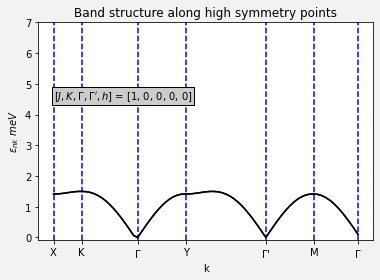

In [22]:
smk.band_high_sym(H, cp_strg, 20)

In [ ]:
smk.bdg(H,0,0)

In [37]:
Hlsw_Gamma = Hlsw.subs([(k1,0),(k2,0)])
Hlsw_Gamma

Matrix([
[                            1.5*J,                                 0,                                 0, -1.5*J + 1.83697019872103e-16*I*J],
[                                0,                             1.5*J, -1.5*J + 1.83697019872103e-16*I*J,                                 0],
[                                0, -1.5*J - 1.83697019872103e-16*I*J,                             1.5*J,                                 0],
[-1.5*J - 1.83697019872103e-16*I*J,                                 0,                                 0,                             1.5*J]])

In [39]:
Hlsw_Gamma_prime = Hlsw.subs([(k1,4*np.pi),(k2,4*np.pi/np.sqrt(3))])
Hlsw_Gamma_prime

Matrix([
[                                                                                                                                                                                                                                                                    1.5*J,                                                                                                                                                                                                                                                                      0,                                                                                                                                                                                                                                                                         0, 0.5*(-1.0*J + 1.22464679914735e-16*I*J)*exp(I*(-6.28318530717959 - 1.20919957615615*sqrt(3))) + 0.5*(-1.0*J + 1.22464679914735e-16*I*J)*exp(I*(6.28318530717959 - 1.20919957615615*sqrt(3))) + 0